In [32]:
## Plotting Libaray
import matplotlib.pyplot as plt ## used for creating Graphs and charts
import seaborn as sns ## used for creating Graphs and charts
## Pandas Dataframe Library
import pandas as pd 
## Numpy Library
import numpy as np ## used for methamtical compution and handle multi-dimensional arrays and matrices
## Train and Test Split
from sklearn.model_selection import train_test_split
## Evaluation Matrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Normalize
from sklearn.preprocessing import MinMaxScaler
## Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
## Kfold and ROC
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix,auc
from sklearn.model_selection import train_test_split, cross_val_score
##Code
import tensorflow
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from sklearn.gaussian_process import GaussianProcessClassifier

**Pipeline**

Following steps are Implemented in this project

1. Import Dataset
2. Exploratory Data Analysis
3. Data PreProcessing 
   *  Data formatting
   *  Data cleaning
   *  Data sampling
4. Feature selection/Importance  
5. Data Transformation 
   *  Normalization
6. Split Dataset 
   *  Training set
   *  Test set
7. Training
   *  Model training
   *  Model Prediction
8. Evaluation
    * Confusion Matrix 
    * Classification Report
    * ROC Evaluation

## Load Data

In [33]:
df = pd.read_csv (r'/content/sample_data/charliehebdo.csv')
df1 = pd.read_csv (r'/content/sample_data/ferguson.csv')
df2 = pd.read_csv (r'/content/sample_data/germanwings-crash.csv')
df3 = pd.read_csv (r'/content/sample_data/ottawashooting.csv')
df4 = pd.read_csv (r'/content/sample_data/sydneysiege.csv')

In [34]:
df =df.append(df1)
df =df.append(df2)
df =df.append(df3)
df =df.append(df4)

In [35]:
## Dimensionlaity of the Model
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 103212
Number of Columns: 59


## Columns

In [36]:
df.columns

Index(['is_rumor', 'thread', 'in_reply_tweet', 'event', 'tweet_id',
       'is_source_tweet', 'in_reply_user', 'user_id', 'tweet_length',
       'symbol_count', 'user_mentions', 'urls_count', 'media_count',
       'hashtags_count', 'retweet_count', 'favorite_count', 'mentions_count',
       'is_truncated', 'created', 'has_smile_emoji', 'sensitive', 'has_place',
       'has_coords', 'has_quest', 'has_exclaim', 'has_quest_or_exclaim',
       'user.tweets_count', 'user.verified', 'user.followers_count',
       'user.listed_count', 'user.desc_length', 'user.handle_length',
       'user.name_length', 'user.notifications', 'user.friends_count',
       'user.time_zone', 'user.has_bg_img', 'user.default_pic',
       'user.created_at', 'user.location', 'user.profile_sbcolor',
       'user.profile_bgcolor', 'user.utc_dist', 'hasperiod', 'number_punct',
       'negativewordcount', 'positivewordcount', 'capitalratio',
       'contentlength', 'sentimentscore', 'Noun', 'Verb', 'Adjective',
       'P

# Type of Columns

In [37]:
df.dtypes

is_rumor                  int64
thread                    int64
in_reply_tweet          float64
event                    object
tweet_id                  int64
is_source_tweet           int64
in_reply_user           float64
user_id                   int64
tweet_length              int64
symbol_count              int64
user_mentions             int64
urls_count                int64
media_count               int64
hashtags_count            int64
retweet_count             int64
favorite_count            int64
mentions_count            int64
is_truncated              int64
created                 float64
has_smile_emoji           int64
sensitive                 int64
has_place                 int64
has_coords                int64
has_quest                 int64
has_exclaim               int64
has_quest_or_exclaim      int64
user.tweets_count         int64
user.verified             int64
user.followers_count      int64
user.listed_count         int64
user.desc_length          int64
user.han

## Exploratory Analysis

## Checking Total Rumors and Non Rumors Division

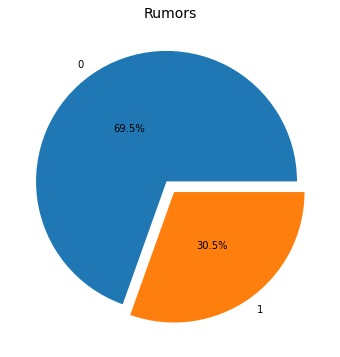

In [119]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=df['is_rumor'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['is_rumor'].value_counts().index, pctdistance=0.5)
plt.title("Rumors", fontsize=14);
pie.savefig("Rumors.png")

In [118]:
df['is_rumor'].value_counts()

0    71782
1    31430
Name: is_rumor, dtype: int64

In [117]:
y.value_counts()

0    1555
1    1555
Name: is_rumor, dtype: int64

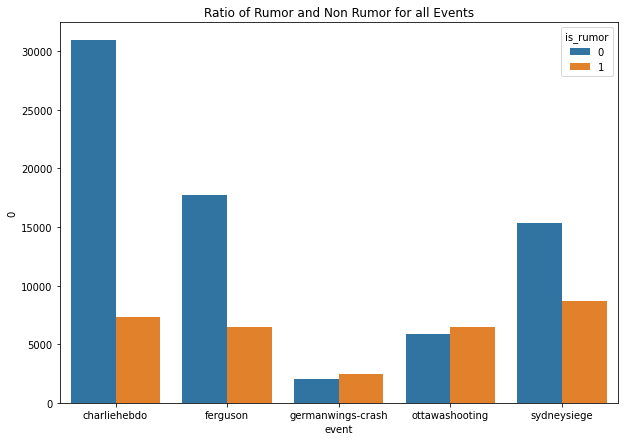

In [39]:
rumors = df.groupby(['event','is_rumor']).size().reset_index()
plt.figure(figsize=(10,7))
plt.title("Ratio of Rumor and Non Rumor for all Events")
ax = sns.barplot(x="event", y=0, hue="is_rumor", data=rumors)

## Thread Structures

One reason to use a classifier on tweet threads instead of individual tweets is that the conversation constitutes a graph structure where additional features can be extracted that can't when tweets are considered in isolation. For each event, most of the tweets are replies to other tweets.

In [40]:
pd.crosstab([df["event"]], df["is_source_tweet"], 
            margins = True).style.background_gradient(cmap = "summer_r")

is_source_tweet,0,1,All
event,,,
charliehebdo,36189,2079,38268
ferguson,23032,1143,24175
germanwings-crash,4020,469,4489
ottawashooting,11394,890,12284
sydneysiege,22775,1221,23996
All,97410,5802,103212


In [30]:
import plotly.express as px

In [41]:
source = df.groupby(by=["event", "is_source_tweet"]).size().reset_index(name="counts")

In [42]:
px.bar(data_frame=source, x="event", y="counts", color="is_source_tweet", barmode="group")

## Classification Through Threads

In [43]:
def data_fetch(file, normlized_data=True):
    x = pd.read_csv("/content/threads/%s.csv" % file, engine="python")
    y = x.is_rumor
    x = x.drop(["is_rumor", "thread"], axis=1)
    if normlized_data:
        x = (x - x.mean()) / x.std()
    return x, y

In [44]:
file=[ "germanwings-crash","sydneysiege","ottawashooting","ferguson","charliehebdo",]
events={}
for i in file:
    x,y=data_fetch(i)
    x=x.drop(x.columns.values[np.where(np.isnan(x.values))[1]],axis=1)
    events[i]={'x':x.values,'y':y.values,'columns':x.columns}

## Checking NULL

In [45]:
x.isnull().sum()  

Verb_mean              0
Verb_sum               0
Verb_var               0
has_coords_mean        0
has_coords_sum         0
                      ..
resp_var               0
component_count        0
largest_cc_diameter    0
time_to_first_resp     0
time_to_last_resp      0
Length: 111, dtype: int64

## **Person Correlation**

The correlation coefficient has values between -1 to 1
— 

* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
*  A value closer to 1 implies stronger positive correlation
*  A value closer to -1 implies stronger negative correlation


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



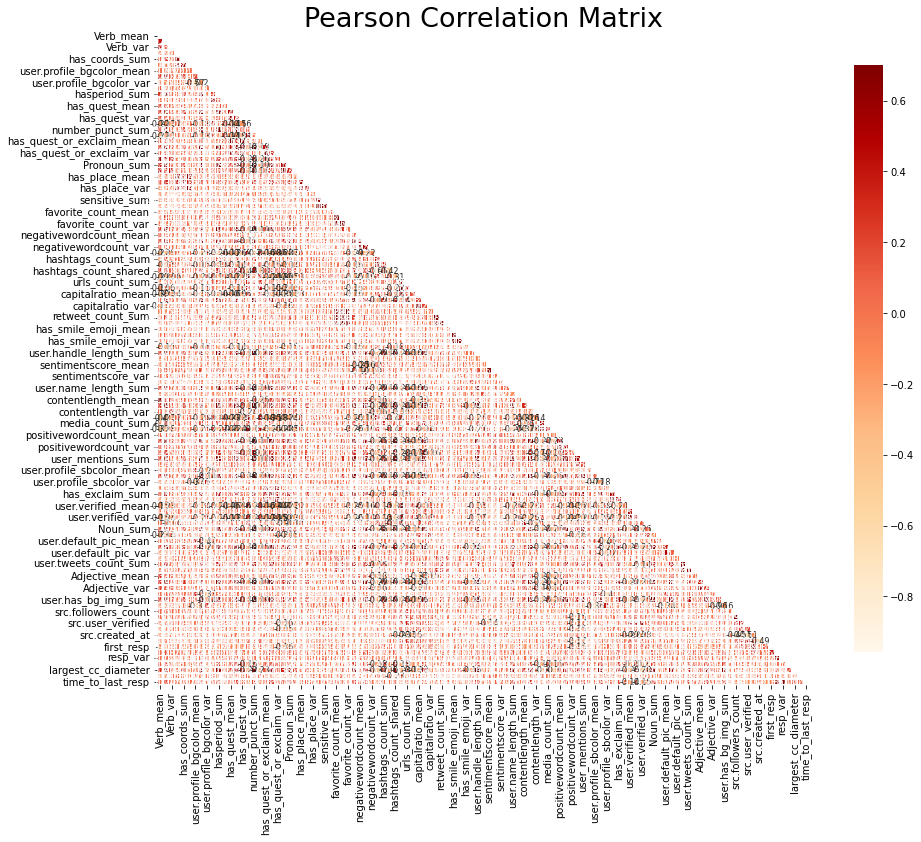

In [46]:
features = x.columns ## Fetching all Features Column names
## Applying Pearson Correaltion 
mask = np.zeros_like(x[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
## Creating a Plot Diagram
f, ax = plt.subplots(figsize=(16, 12))
## Title of Plot
plt.title('Pearson Correlation Matrix',fontsize=27)
sns.heatmap(x[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="OrRd", 
linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

## **High Correlated Variables tends to have smiliar imforamtion which tend to bring down the performace of model so highly correlated features  will be removed from the model**

In [47]:
relevant_features = mask[mask>0.9] ## selecting features with 80% correlation
corr_matrix = x.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



## Following features were removed from the dataset

In [48]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
x = x.drop(x[to_drop], axis=1)
to_drop

['has_coords_var',
 'user.profile_bgcolor_sum',
 'hasperiod_sum',
 'has_quest_var',
 'number_punct_sum',
 'has_quest_or_exclaim_sum',
 'Pronoun_sum',
 'has_place_var',
 'sensitive_var',
 'thread_length',
 'negativewordcount_var',
 'retweet_count_sum',
 'retweet_count_var',
 'has_smile_emoji_var',
 'user.handle_length_sum',
 'user.name_length_sum',
 'contentlength_sum',
 'user_mentions_sum',
 'user.profile_sbcolor_sum',
 'has_exclaim_var',
 'user.verified_var',
 'Noun_sum',
 'user.default_pic_sum',
 'Adjective_sum',
 'user.has_bg_img_sum',
 'user.has_bg_img_var',
 'src.listed_count',
 'first_resp']

## **Feature Selection**

### Feature selection or Importance is a method to select the features which as a profound effect on the model basically using mathemetical formulas it help us in identifying top features that effect the outcome. Using it we can select the top features which can enventually help in improving the processing power of the model during training

* Random Forest Feature Importance method is used to selct top Features


In [49]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x, y)

RandomForestClassifier(random_state=0)

In [50]:
feature_scores = pd.Series(clf.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores

favorite_count_var      0.063615
favorite_count_sum      0.051802
src.followers_count     0.041082
created                 0.039251
favorite_count_mean     0.029042
                          ...   
sensitive_mean          0.002606
has_coords_sum          0.002142
has_smile_emoji_mean    0.001231
sensitive_sum           0.000895
has_smile_emoji_sum     0.000499
Length: 83, dtype: float64

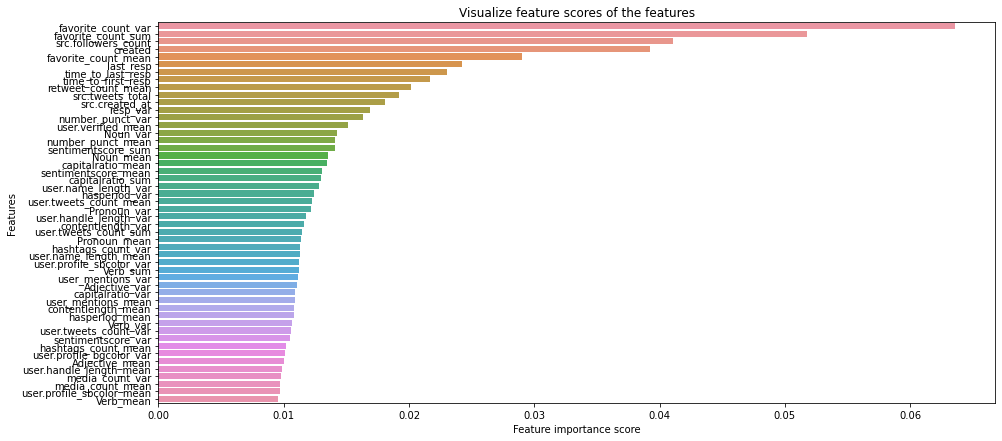

In [51]:
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=feature_scores[0:50], y=feature_scores.index[0:50])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## **Top 50 Features**

In [52]:
## Selecting top 50 features based on the ranking
features = feature_scores.index[0:50]
X = x[features]

In [53]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

## Train and Test Split Data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  2488
X_test:  622
y_train:  2488
y_test:  622


## Model Training

In [55]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [56]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.gaussian_process.kernels import RBF

In [57]:
dt = DecisionTreeClassifier(random_state=7)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=7)
knn = KNeighborsClassifier()
catboost = CatBoostClassifier(verbose=0)
adaboost = AdaBoostClassifier(n_estimators=100)
gp =GaussianProcessClassifier(1.0 * RBF(1.0))

## Neural Network

In [58]:
from keras.wrappers.scikit_learn import KerasClassifier

In [59]:
def NeuralFeedForward():
    clf = Sequential()
    clf.add(Dense(256, activation='relu', input_dim=50))
    clf.add(Dense(128, activation='relu'))
    clf.add(Dense(64, activation='relu'))
    clf.add(Dense(32, activation='relu'))
    clf.add(Dense(16, activation='relu'))
    clf.add(Dense(1, activation='sigmoid'))
    clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    return clf

clf = KerasClassifier(NeuralFeedForward, epochs=2000, batch_size=20, verbose=0)
clf._estimator_type = "classifier"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



## Voting Classifier

Voting Classifier is a technique of machine learning used when ensamble modeling consisting of numerous models is performed, it is used to predict the output by finding the highest likelihood of the result of the chosen class.It simply sums up the results of each classifier that has been given into Voting Classifier and predicts the output class based on the largest majority of votes or heighst probabilty.

**Soft Voting**: In Soft voting, the output class is the prediction based on the highest Probabilty 

In [60]:
from sklearn.ensemble import VotingClassifier #create a dictionary of our models

estimators= [("dt", dt), ("rf", rf_clf), ("knn", knn),("dnn",clf),("cat",catboost),("ada",adaboost),("gp",gp)] #create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting = "soft")

## Ensemble model is created with Four Models




### Esmeble model train all four model together then using Voting Classifier the class with the highest probabilty from all four model are selected as output 


In [61]:
Model = []
Accuracy = []
f1 = []
precision = []
recall = []
support = []

In [62]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=7)),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     random_state=7)),
                             ('knn', KNeighborsClassifier()),
                             ('dnn',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f18f2e6d850>),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7f18f2def850>),
                             ('ada', AdaBoostClassifier(n_estimators=100)),
                             ('gp',
                              GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)))],
                 voting='soft')

## Model Accuracy

In [63]:
pred = ensemble.predict(X_test)

In [64]:
print("Test score is:",ensemble.score(X_test,y_test)*100)

Test score is: 90.35369774919614


In [65]:
Model.append("Ensemble Model")
Accuracy.append(ensemble.score(X_test,y_test))

In [66]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [67]:
f1.append(f1_score(y_test, pred, average='weighted'))
precision.append(precision_score(y_test, pred, average='weighted'))
recall.append(recall_score(y_test, pred, average='weighted'))

## Confusion Matrix


*   TP: Attacks that are detected Correctly
*   TN: Normal Flow that are detected Correctly as harmless
*   FP: Normal Flow that are detected incorrectly as attack
*   FN: Attack that are detected incorrectly as normal









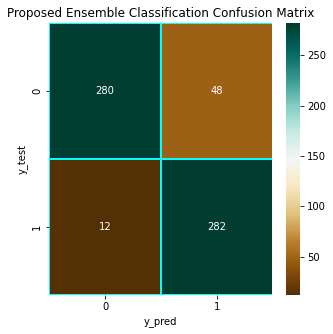

In [68]:
# Creating the confusion matrix:
e_cm = confusion_matrix(y_test, pred)
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(e_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Proposed Ensemble Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       328
           1       0.85      0.96      0.90       294

    accuracy                           0.90       622
   macro avg       0.91      0.91      0.90       622
weighted avg       0.91      0.90      0.90       622



## **ROC CURVE**

Receiver operating characteristic curve (ROC curve) is a graph that shows how well a classification model performs across all categorization levels. It basically consit of two rates:



*   True Postive Rate
*   False Postive Rate

Through these rate the performace of the classification model is measure on the classification Threshold which infact help in evaluating the strength of the model



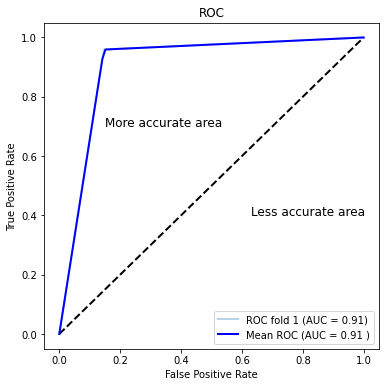

In [70]:
tpmatrics = []
accur = []
fpr_mean = np.linspace(0,1,100)
i = 1
fig = plt.figure(figsize=[6,6])
falsepr, truepr, t = roc_curve(y_test, pred) ## Give false postive rate and true positive rate values 
tpmatrics.append(np.interp(fpr_mean, falsepr, truepr)) ## appending values in the matrics together using Numpy linear interpolation method
auc_roc = auc(falsepr, truepr) ## Calucating the accuracy
accur.append(auc_roc) ## appending the accuracy in matrics
## Ploting the graph
plt.plot(falsepr, truepr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, auc_roc))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
tpr_mean = np.mean(tpmatrics, axis=0)
auc_mean = auc(fpr_mean, tpr_mean)
plt.plot(fpr_mean, tpr_mean, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (auc_mean),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.15,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## KNN 

In [71]:
knn = KNeighborsClassifier()

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
pred = knn.predict(X_test)

In [74]:
print("Test score is:",knn.score(X_test,y_test)*100)

Test score is: 69.93569131832797


In [75]:
Model.append("KNN Model")
Accuracy.append(knn.score(X_test,y_test))
f1.append(f1_score(y_test, pred, average='weighted'))
precision.append(precision_score(y_test, pred, average='weighted'))
recall.append(recall_score(y_test, pred, average='weighted'))

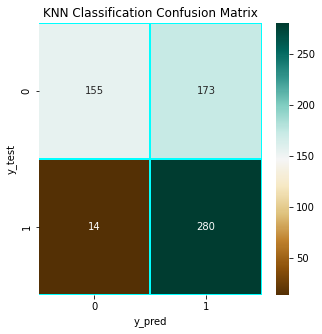

In [76]:
# Creating the confusion matrix:
e_cm = confusion_matrix(y_test, pred)
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(e_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [77]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       328
           1       0.62      0.95      0.75       294

    accuracy                           0.70       622
   macro avg       0.77      0.71      0.69       622
weighted avg       0.78      0.70      0.68       622



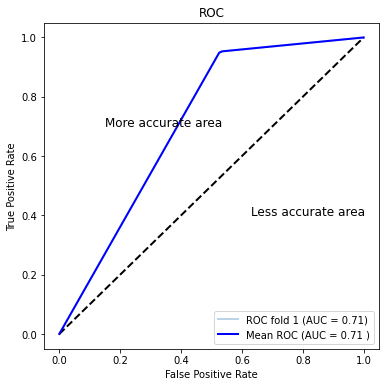

In [78]:
tpmatrics = []
accur = []
fpr_mean = np.linspace(0,1,100)
i = 1
fig = plt.figure(figsize=[6,6])
falsepr, truepr, t = roc_curve(y_test, pred) ## Give false postive rate and true positive rate values 
tpmatrics.append(np.interp(fpr_mean, falsepr, truepr)) ## appending values in the matrics together using Numpy linear interpolation method
auc_roc = auc(falsepr, truepr) ## Calucating the accuracy
accur.append(auc_roc) ## appending the accuracy in matrics
## Ploting the graph
plt.plot(falsepr, truepr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, auc_roc))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
tpr_mean = np.mean(tpmatrics, axis=0)
auc_mean = auc(fpr_mean, tpr_mean)
plt.plot(fpr_mean, tpr_mean, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (auc_mean),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.15,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## Random Forest

In [79]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=7)

In [80]:
pred = rf_clf.predict(X_test)

In [81]:
print("Test score is:",rf_clf.score(X_test,y_test)*100)

Test score is: 78.29581993569131


In [82]:
Model.append("Random Forest Model")
Accuracy.append(rf_clf.score(X_test,y_test))
f1.append(f1_score(y_test, pred, average='weighted'))
precision.append(precision_score(y_test, pred, average='weighted'))
recall.append(recall_score(y_test, pred, average='weighted'))

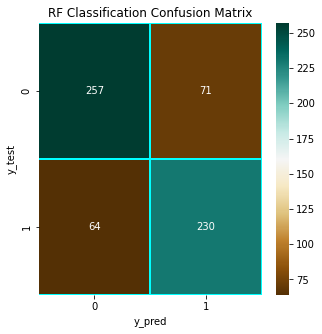

In [83]:
# Creating the confusion matrix:
e_cm = confusion_matrix(y_test, pred)
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(e_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('RF Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [84]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       328
           1       0.76      0.78      0.77       294

    accuracy                           0.78       622
   macro avg       0.78      0.78      0.78       622
weighted avg       0.78      0.78      0.78       622



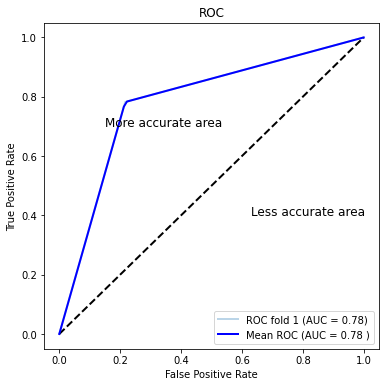

In [85]:
tpmatrics = []
accur = []
fpr_mean = np.linspace(0,1,100)
i = 1
fig = plt.figure(figsize=[6,6])
falsepr, truepr, t = roc_curve(y_test, pred) ## Give false postive rate and true positive rate values 
tpmatrics.append(np.interp(fpr_mean, falsepr, truepr)) ## appending values in the matrics together using Numpy linear interpolation method
auc_roc = auc(falsepr, truepr) ## Calucating the accuracy
accur.append(auc_roc) ## appending the accuracy in matrics
## Ploting the graph
plt.plot(falsepr, truepr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, auc_roc))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
tpr_mean = np.mean(tpmatrics, axis=0)
auc_mean = auc(fpr_mean, tpr_mean)
plt.plot(fpr_mean, tpr_mean, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (auc_mean),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.15,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## Decision Tree

In [108]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [109]:
pred = dt.predict(X_test)

In [110]:
print("Test score is:",dt.score(X_test,y_test)*100)

Test score is: 78.45659163987139


In [111]:
Model.append("Decision Tree Model")
Accuracy.append(dt.score(X_test,y_test))
f1.append(f1_score(y_test, pred, average='weighted'))
precision.append(precision_score(y_test, pred, average='weighted'))
recall.append(recall_score(y_test, pred, average='weighted'))

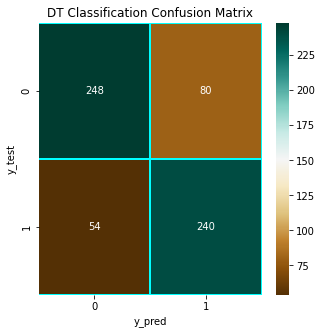

In [112]:
# Creating the confusion matrix:
e_cm = confusion_matrix(y_test, pred)
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(e_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('DT Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [113]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       328
           1       0.75      0.82      0.78       294

    accuracy                           0.78       622
   macro avg       0.79      0.79      0.78       622
weighted avg       0.79      0.78      0.78       622



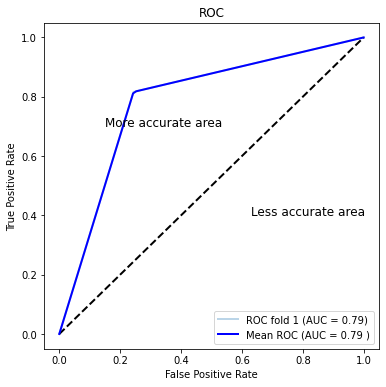

In [114]:
tpmatrics = []
accur = []
fpr_mean = np.linspace(0,1,100)
i = 1
fig = plt.figure(figsize=[6,6])
falsepr, truepr, t = roc_curve(y_test, pred) ## Give false postive rate and true positive rate values 
tpmatrics.append(np.interp(fpr_mean, falsepr, truepr)) ## appending values in the matrics together using Numpy linear interpolation method
auc_roc = auc(falsepr, truepr) ## Calucating the accuracy
accur.append(auc_roc) ## appending the accuracy in matrics
## Ploting the graph
plt.plot(falsepr, truepr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, auc_roc))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
tpr_mean = np.mean(tpmatrics, axis=0)
auc_mean = auc(fpr_mean, tpr_mean)
plt.plot(fpr_mean, tpr_mean, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (auc_mean),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.15,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## ADAboost

In [93]:
adaboost = AdaBoostClassifier(n_estimators=100)

In [94]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [95]:
pred = adaboost.predict(X_test)

In [96]:
print("Test score is:",adaboost.score(X_test,y_test)*100)

Test score is: 81.83279742765274


In [97]:
Model.append("Adabost Model")
Accuracy.append(adaboost.score(X_test,y_test))
f1.append(f1_score(y_test, pred, average='weighted'))
precision.append(precision_score(y_test, pred, average='weighted'))
recall.append(recall_score(y_test, pred, average='weighted'))

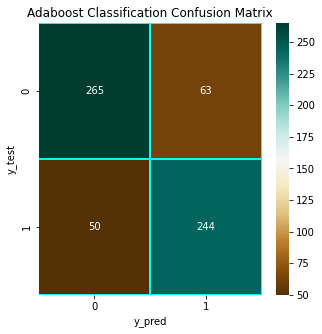

In [98]:
# Creating the confusion matrix:
e_cm = confusion_matrix(y_test, pred)
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(e_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Adaboost Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [99]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       328
           1       0.79      0.83      0.81       294

    accuracy                           0.82       622
   macro avg       0.82      0.82      0.82       622
weighted avg       0.82      0.82      0.82       622



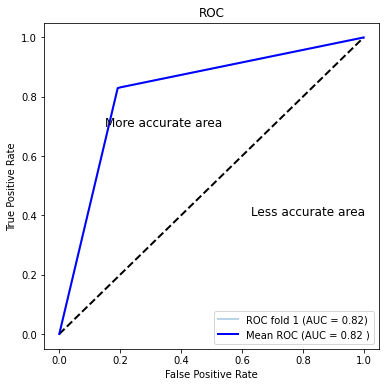

In [100]:
tpmatrics = []
accur = []
fpr_mean = np.linspace(0,1,100)
i = 1
fig = plt.figure(figsize=[6,6])
falsepr, truepr, t = roc_curve(y_test, pred) ## Give false postive rate and true positive rate values 
tpmatrics.append(np.interp(fpr_mean, falsepr, truepr)) ## appending values in the matrics together using Numpy linear interpolation method
auc_roc = auc(falsepr, truepr) ## Calucating the accuracy
accur.append(auc_roc) ## appending the accuracy in matrics
## Ploting the graph
plt.plot(falsepr, truepr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, auc_roc))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
tpr_mean = np.mean(tpmatrics, axis=0)
auc_mean = auc(fpr_mean, tpr_mean)
plt.plot(fpr_mean, tpr_mean, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (auc_mean),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.15,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## Model Perfromance

In [101]:
performance = pd.DataFrame()

In [102]:
performance['Models'] = Model
performance['Accuracy'] = Accuracy
performance['F1 Score'] = f1
performance['Precision'] = precision
performance['Recall'] = recall

## Table

In [103]:
performance

,Models,Accuracy,F1 Score,Precision,Recall
0,Ensemble Model,0.903537,0.903519,0.909577,0.903537
1,KNN Model,0.699357,0.683262,0.775804,0.699357
2,Random Forest Model,0.782958,0.783064,0.783369,0.782958
3,Decision Tree Model,0.784566,0.784682,0.787542,0.784566
4,Adabost Model,0.818328,0.818456,0.819299,0.818328


## Accuracy

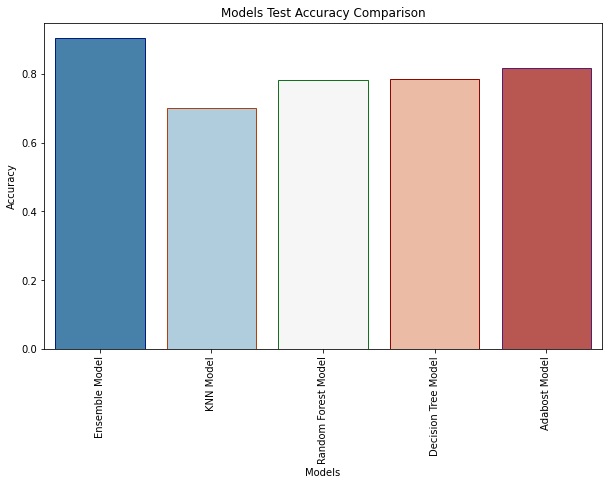

In [104]:
plt.subplots(figsize=(10,6))
sns.barplot(x="Models", y="Accuracy",data=performance,palette='RdBu_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Models Test Accuracy Comparison')
plt.show()

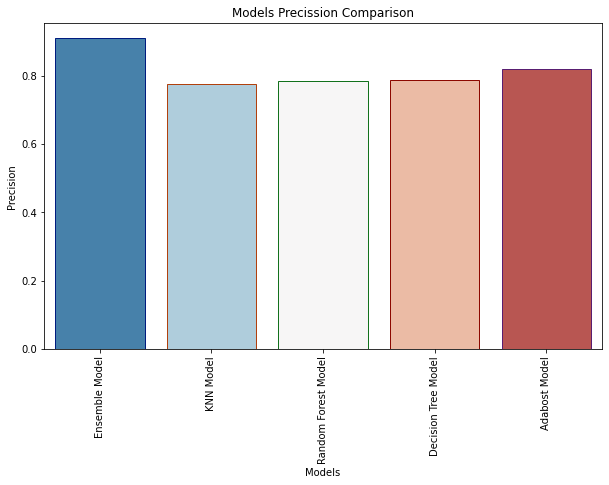

In [105]:
plt.subplots(figsize=(10,6))
sns.barplot(x="Models", y="Precision",data=performance,palette='RdBu_r',edgecolor=sns.color_palette('dark',5))
plt.xticks(rotation=90)
plt.title('Models Precission Comparison')
plt.show()

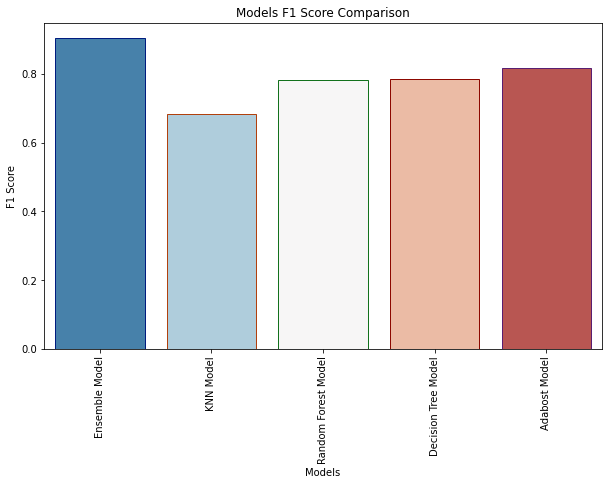

In [106]:
plt.subplots(figsize=(10,6))
sns.barplot(x="Models", y="F1 Score",data=performance,palette='RdBu_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Models F1 Score Comparison')
plt.show()

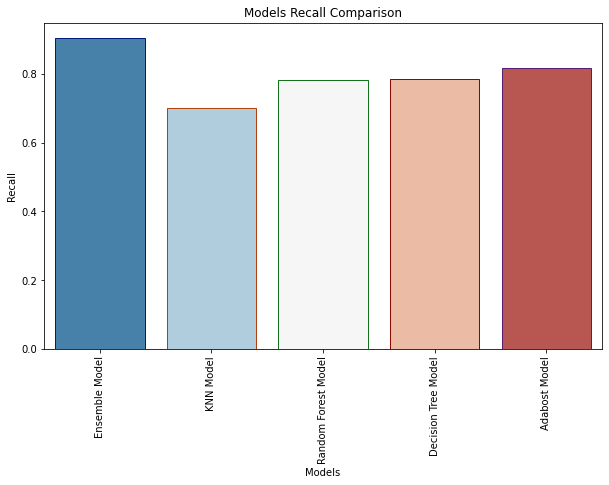

In [107]:
plt.subplots(figsize=(10,6))
sns.barplot(x="Models", y="Recall",data=performance,palette='RdBu_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Models Recall Comparison')
plt.show()